# bQTL-motif distance vs p-value: TF-MoDISco vs CISBP

- Calculate the distance between each bQTL SNP to its nearest MoDISco motif and to CIS-BP motif.
- Plot distance vs -log10(p-value)
- Cap the distance at 1000bp and plot the distance vs -log10(p-value)

2.0
(1795, 1134)


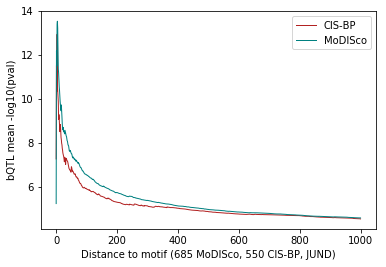

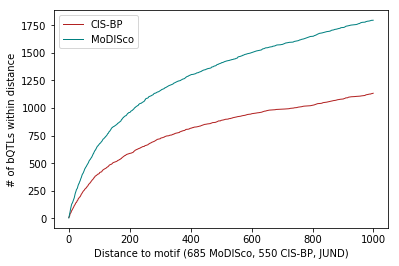

(2257, 1941)


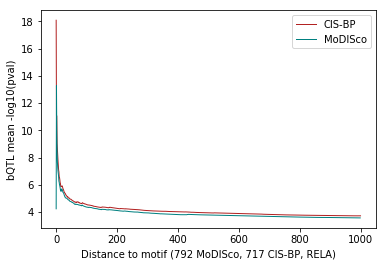

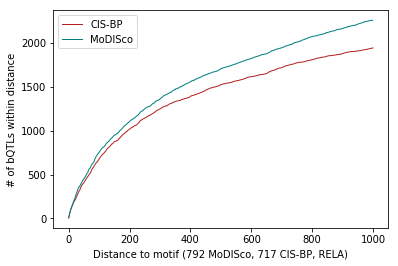

(2019, 1795)


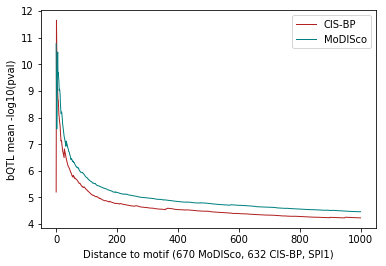

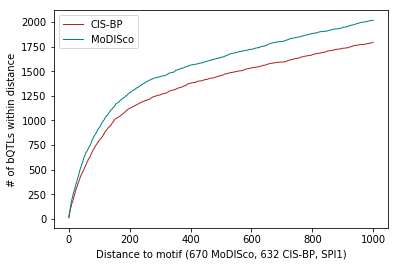

(66, 70)


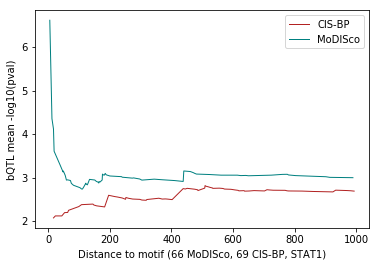

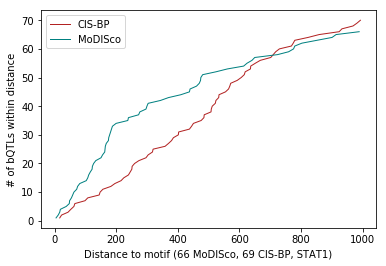

In [24]:
from collections import OrderedDict
tf_list = [ 'JUND', 'RELA', 'SPI1', 'STAT1']


# In[7]:


import math
import numpy as np
modisco_dir = "/home/ktian/kundajelab/tfnet/results/nandi/"

big_str = "_full"
#big_str = "_big"
#big_str = ""

modisco_tsv_fns = [
    "JUND/JUND_GM12878_refine_18_09_04/modisco.run2/JUND_modisco_snp_dist_pval" + big_str + ".tsv",
    "RELA/RELA_GM12878_refine_18_09_04/modisco.run3/RELA_modisco_snp_dist_pval" + big_str + ".tsv",
    "SPI1/SPI1_GM12878_refine_18_09_04/modisco.run3/SPI1_modisco_snp_dist_pval" + big_str + ".tsv",
    "STAT1/STAT1_GM12878_refine_18_09_04/modisco.run2/STAT1_modisco_snp_dist_pval" + big_str + ".tsv",
]

def proc_sorted_list(slist, max_dist=0):

    mean_dict = OrderedDict()
    cnt_dict  = OrderedDict()
    curr_sum = 0
    curr_cnt = 0
    for item in slist:
        dist = int(item[0])
        pval = item[1]

        if max_dist != 0 and dist > max_dist:
            break

        curr_sum += pval
        curr_cnt += 1
        curr_mean = curr_sum / curr_cnt
        #print(curr_cnt, dist, curr_mean)
        mean_dict[dist] = curr_mean
        cnt_dict[dist] = curr_cnt
    
    return mean_dict, cnt_dict

import math
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from scipy.stats import gaussian_kde

p_thresh = 0.01
log_p_thresh = -math.log(0.01, 10)
print(p_thresh)
import scipy.stats
for i, tf in enumerate(tf_list):
    snp_list_m = []
    with open(modisco_dir + modisco_tsv_fns[i]) as fh:
        for row in fh:
            item = row.split('\t')
            item[0] = int(item[0])   # distance
            item[1] = float(item[1]) # p-value
            snp_list_m.append(item)

    snp_list_c = []
    with open("under_1ksummit/" + tf + "_cisbp" + big_str + ".tsv") as fh:
        for row in fh:
            item = row.split('\t')
            item[0] = int(item[0])   # distance
            item[1] = float(item[1]) # p-value
            snp_list_c.append(item)
   
    short_list_m = [item for item in snp_list_m if item[0] <= 1000 and item[1] >= log_p_thresh]
    
    short_list_c = [item for item in snp_list_c if item[0] <= 1000 and item[1] >= log_p_thresh]

    print(len(short_list_m), len(short_list_c))

    sorted_list_m = sorted(short_list_m, key=lambda x: (x[0], -x[1]))
    sorted_list_c = sorted(short_list_c, key=lambda x: (x[0], -x[1]))

    dict_m, cnt_m = proc_sorted_list(sorted_list_m, 1000)
    dict_c, cnt_c = proc_sorted_list(sorted_list_c, 1000)

    #print(cnt_m, cnt_c)
    #print("new dict")

    # plot mean -----------------------------------------------------------------
    x = [ k for k in dict_m ]
    y = [ dict_m[k] for k in dict_m ]
    xc = [ k for k in dict_c ]
    yc = [ dict_c[k] for k in dict_c ]

    fig = plt.figure()
    #im = plt.scatter(xc, yc, c='firebrick', alpha=1, marker='.', label="CIS-BP", s=1) # red  CIS-BP
    #im = plt.scatter(x,  y,  c='teal', alpha=1, marker='.', label="MoDISco", s=1) # blue modisco
    im = plt.plot(xc, yc, c='firebrick', alpha=1, label="CIS-BP", linewidth=1) # red  CIS-BP
    im = plt.plot(x,  y,  c='teal', alpha=1, label="MoDISco", linewidth=1) # blue modisco
           
    plt.xlabel("Distance to motif (" + str(len(dict_m)) + " MoDISco, " + str(len(dict_c)) + " CIS-BP, " + tf + ")")
    plt.ylabel("bQTL mean -log10(pval)")
    plt.legend()
    plt.show()    
    fig.savefig("under_1ksummit/" + tf + "_cmp_mean.png", bbox_inches='tight')

    # plot cnt -----------------------------------------------------------------
    x = [ k for k in cnt_m ]
    y = [ cnt_m[k] for k in cnt_m ]
    xc = [ k for k in cnt_c ]
    yc = [ cnt_c[k] for k in cnt_c ]
    
    fig = plt.figure()
    #im = plt.scatter(xc, yc, c='firebrick', alpha=1, marker='.', label="CIS-BP", s=1) # red  CIS-BP
    #im = plt.scatter(x,  y,  c='teal', alpha=1, marker='.', label="MoDISco", s=1) # blue modisco
    im = plt.plot(xc, yc, c='firebrick', alpha=1, label="CIS-BP", linewidth=1) # red  CIS-BP
    im = plt.plot(x,  y,  c='teal', alpha=1, label="MoDISco", linewidth=1) # blue modisco
           
    plt.xlabel("Distance to motif (" + str(len(dict_m)) + " MoDISco, " + str(len(dict_c)) + " CIS-BP, " + tf + ")")
    plt.ylabel("# of bQTLs within distance")
    plt.legend()
    plt.show()    
    fig.savefig("under_1ksummit/" + tf + "_cmp_cnt.png", bbox_inches='tight')
